In [1]:
import becquerel as bq
from becquerel import Spectrum
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math
import importlib
import sys  
sys.path.insert(0, r'C:\Users\ahanks\DoseNet\radwatch-analysis')

In [2]:
import PF
import ROI
importlib.reload(PF)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\ahanks\\DoseNet\\radwatch-analysis\\ROI.py'>

In [3]:
import naa_isotope_analyzer as naa
importlib.reload(naa)

<module 'naa_isotope_analyzer' from 'C:\\Users\\ahanks\\DoseNet\\radwatch-analysis\\naa_isotope_analyzer.py'>

In [4]:
def apply_ecal(spec, ecal_filename):
    e_cal_data = np.loadtxt(ecal_filename)
    cal_energies = e_cal_data[:,0]
    cal_chans = e_cal_data[:,1]
    cal = bq.LinearEnergyCal.from_points(cal_chans,cal_energies)
    spec.apply_calibration(cal)
    return spec

In [5]:
def get_isotopes(spec):
    kernel = bq.GaussianPeakFilter(4250, 30, fwhm_at_0=10)
    finder = bq.PeakFinder(spec, kernel)
    plt.figure()
    plt.plot(spec.counts_vals.clip(1e-1), label='Raw spectrum')
    plt.plot(finder._peak_plus_bkg.clip(1e-1), label='Peaks+Continuum')
    plt.plot(finder._bkg.clip(1e-1), label='Continuum')
    plt.plot(finder._signal.clip(1e-1), label='Peaks')
    plt.yscale('log')
    plt.xlim(0, len(spec))
    plt.ylim(3e-1)
    plt.xlabel('Channels')
    plt.ylabel('Counts')
    plt.legend()
    plt.tight_layout()
    
    finder.reset()
    finder.find_peaks(min_snr=10, xmin=50)
    print(finder.channels)
    print(finder.snrs)

    plt.figure()
    plt.title('find_peaks')
    finder.plot()
    plt.tight_layout()

    energies = np.take(spec.bin_edges_kev,finder.channels)
    
    hl_cut = 3600 # half-life cut in seconds
    br_cut = 4.0 # branching ratio cut in %
    df = naa.naa_isotope_analyzer(energies.tolist(),hl_cut,br_cut)

    return df

In [7]:
ecal_filename = r'C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\11-19-2019-Calibration.Ent'

In [8]:
spec_filename = r'C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\ucb1901-30min.Spe'
spec = Spectrum.from_file(spec_filename)
spec = apply_ecal(spec, ecal_filename)

SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\ucb1901-30min.Spe


In [9]:
bg = Spectrum.from_file(r'C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\Background_Spectrum_12_20_19.Spe')
bg = apply_ecal(bg, ecal_filename)

SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\Background_Spectrum_12_20_19.Spe


In [10]:
sub_spec = spec - bg

C:\Users\ahanks\Anaconda3\lib\site-packages\becquerel-0.2.4-py3.7.egg\becquerel\core\spectrum.py:726: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  'have been converted to CPS', SpectrumWarning)


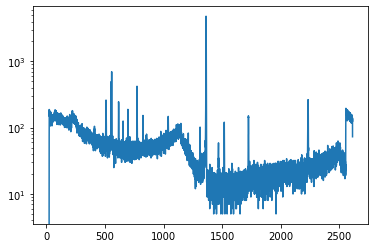

In [11]:
plt.plot(spec.bin_centers_kev, spec.counts_vals)
plt.yscale('log')
plt.show()

C:\Users\ahanks\Anaconda3\lib\site-packages\becquerel-0.2.4-py3.7.egg\becquerel\core\peakfinder.py:181: DeprecationWarning: channels is deprecated and will be removed in a future release. Use centroids instead.
  'release. Use centroids instead.', DeprecationWarning)


[1556.5, 1708.5, 1896.5, 2014.5, 2145.5, 2390.5, 2551.5, 3230.5, 4087.5, 4248.5, 4581.5, 4739.5, 5389.5, 6993.5, 8028.5, 8165.5]
[28.78040124987538, 39.69033246586671, 27.820371001108363, 13.347103825258186, 21.30580264657217, 40.03422006599558, 17.549257559385122, 15.199922835384445, 18.45685591563947, 194.41785622316573, 11.645442054907736, 23.059112618683272, 32.31203855531306, 49.03868224805949, 32.19398610040029, 28.380873368204792]
Backround isotopes [[], [], [], [], [], ['AC228'], [], [], [], [], [], [], [], [], [], []]
Possible isotopes [['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'ZR97', 'TE121', 'PA232'], ['GE77', 'AS76', 'AS76', 'CD117', 'IN114', 'SB122', 'CS134', 'CS134', 'HO166', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'BR82', 'AG110', 'BA131', 'W187', 'W187'], ['AS76', 'RU105', 'AG110', 'TE131', 'CE143', 'ND149'], ['BR82', 'ZR97', 'NB94', 'AG110', 'SB124', 'TE129'], ['ZN71', 'ZN71', 'GA72', 'GE77', 'GE77', 'BR82', 'MO99', 'TE131', 'TE131', 'EU152', 'HO166', 'W187

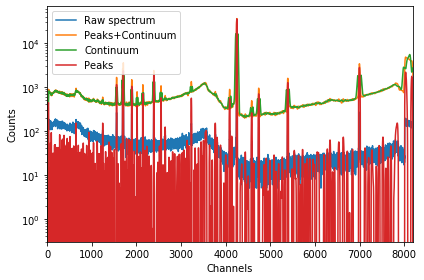

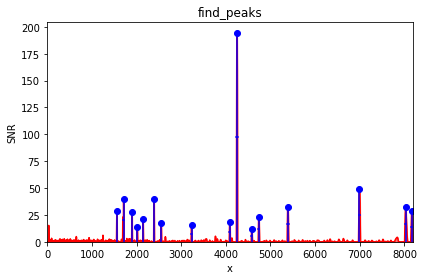

In [12]:
df = get_isotopes(spec)

In [13]:
df

isotopes                                           energies  \
0     BR82  [616.2815289275459, 695.3160317558285, 824.183...   
1    TE131                                [653.7356306694629]   
2    CS134                                [556.6088922539831]   
3     NA24                               [1362.8243026308417]   
4     ZN71                                [508.3629306881238]   
5    AC228                                [773.0809040165884]   
6      K42                               [1518.6714547942422]   

                                    branching ratios  
0  [0.43700000000000006, 0.284, 0.242, 0.276, 0.2...  
1                                           [0.0418]  
2                                          [0.08338]  
3                                         [0.999936]  
4                                            [0.287]  
5                                           [0.0149]  
6                                           [0.1808]

In [17]:
spec_filename = r'C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\ucb1901-3hr.Spe'
spec_3hr = Spectrum.from_file(spec_filename)
spec_3hr = apply_ecal(spec_3hr, ecal_filename)

SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\ucb1901-3hr.Spe


C:\Users\ahanks\Anaconda3\lib\site-packages\becquerel-0.2.4-py3.7.egg\becquerel\core\peakfinder.py:181: DeprecationWarning: channels is deprecated and will be removed in a future release. Use centroids instead.
  'release. Use centroids instead.', DeprecationWarning)


[1246.5, 1558.5, 1710.5, 1897.5, 2016.5, 2146.5, 2392.5, 2553.5, 3232.5, 3771.5, 4091.5, 4253.5, 4586.5, 4743.5, 5395.5, 7000.5, 8029.5, 8165.5]
[23.528730632442592, 46.93161146496303, 76.29222549828924, 62.9123557942495, 26.903992324724147, 44.20969351104894, 85.397078056618, 39.00807430447638, 34.83141618248219, 14.274463511615455, 37.11716246811453, 298.5870765954211, 28.45386185603629, 31.166401253443922, 49.99336458607946, 75.5631122339882, 40.87122862521022, 34.53405224131057]
Backround isotopes [['AC228'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
Possible isotopes [['GE77', 'GE77', 'RU105', 'ND149', 'EU152', 'HO166', 'LU177', 'LU177', 'HF179', 'AU198', 'PA232'], ['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'ZR97', 'TE121', 'PA232'], ['GE77', 'AS76', 'AS76', 'CD117', 'IN114', 'SB122', 'CS134', 'CS134', 'HO166', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'BR82', 'AG110', 'BA131', 'W187', 'W187'], ['AS76', 'RU105', 'AG110', 'TE131', 'CE143', 'ND149']

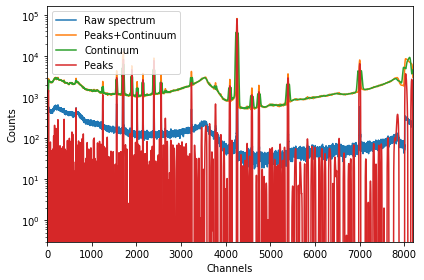

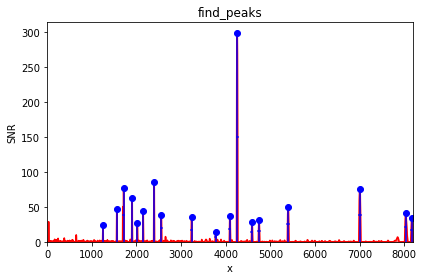

In [18]:
df_3hr = get_isotopes(spec_3hr)

In [20]:
df_3hr

isotopes                                           energies  \
0     BR82  [616.5989365694265, 695.6334393977091, 773.715...   
1    TE131                                [654.3704459532242]   
2    TA182                               [1211.4208574537702]   
3     NA24                                [1364.411340840245]   
4     ZN71                                [508.9977459718851]   
5    AC228                               [409.96656170512136]   
6    HO166                                [557.2437075377444]   
7      K42                               [1519.9410853617649]   

                                    branching ratios  
0  [0.43700000000000006, 0.284, 0.836, 0.242, 0.2...  
1                                           [0.0418]  
2                                           [0.2723]  
3                                         [0.999936]  
4                                            [0.287]  
5                                           [0.0192]  
6                                           [0.0541]  
7                                           [0.1808]

In [22]:
spec_filename = r'C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\ucb1901-24hr.Spe'
spec_24hr = Spectrum.from_file(spec_filename)
spec_24hr = apply_ecal(spec_24hr, ecal_filename)

SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\ucb1901-24hr.Spe


C:\Users\ahanks\Anaconda3\lib\site-packages\becquerel-0.2.4-py3.7.egg\becquerel\core\peakfinder.py:181: DeprecationWarning: channels is deprecated and will be removed in a future release. Use centroids instead.
  'release. Use centroids instead.', DeprecationWarning)


[244.5, 381.5, 537.5, 785.5, 830.5, 1247.5, 1558.5, 1693.5, 1898.5, 2017.5, 2147.5, 2393.5, 2554.5, 3233.5, 3459.5, 4093.5, 4254.5, 4540.5, 4589.5, 5393.5, 7001.5, 8030.5, 8163.5]
[10.150018047984478, 11.404904801619672, 11.457975408490494, 11.844367942825437, 13.658770159983105, 39.821262386174816, 28.690671341841856, 65.28373442491728, 63.72752507414199, 16.348820144849036, 47.00558483692444, 86.43419059751872, 42.01501573819539, 41.97213529129092, 26.657601217420527, 40.24805071713955, 66.95579078093738, 20.372190528712167, 27.437117909628828, 10.020745795778726, 16.86813367473344, 13.17721899193074, 10.027539911146247]
Backround isotopes [[], [], ['U235'], [], ['TL208'], ['AC228'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
Possible isotopes [['SE75', 'CD107', 'CD117', 'TE131', 'ND147', 'ND149', 'SM153', 'GD153', 'GD153', 'DY165', 'YB169', 'LU177', 'HF180', 'TA182', 'RE186', 'PT195', 'AU198', 'PA232', 'PA232', 'PA232', 'U235', 'U235', 'U235'], ['FE59', 'ZN7

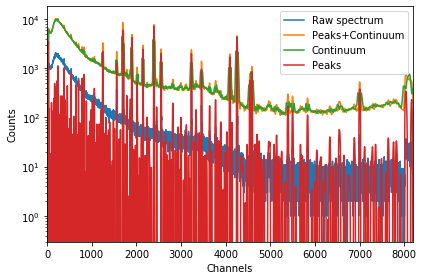

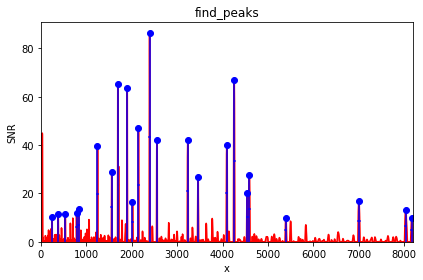

In [23]:
df_24hr = get_isotopes(spec_24hr)

In [24]:
df_24hr

isotopes                                           energies  \
0             BR82  [551.8477776257733, 616.9163442113072, 695.950...   
1            TE131  [91.92410454070705, 135.40895147835653, 654.68...   
2            TL208                                [277.9249826827697]   
3             U235                                [184.9245436117384]   
4             NA24                               [1364.7287484821256]   
5  SE Unidentified                               [1726.2560525841893]   
6             ZN71                                [508.9977459718851]   
7            AC228                                 [410.283969347002]   
8            BA133                                [263.6416387981403]   
9              K40                               [1455.5073340599924]   

                                    branching ratios  
0  [0.7170000000000001, 0.43700000000000006, 0.28...  
1                      [0.0766, 0.049, 0.0418, 0.11]  
2                                           [0.0631]  
3                                            [0.572]  
4                                         [0.999936]  
5                                           [[None]]  
6                                            [0.287]  
7                                           [0.0192]  
8                                           [0.1769]  
9                                           [0.1066]